In [6]:
!pip install mediapipe opencv-python

In [6]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing=mp.solutions.drawing_utils ## visualising our poses our moment
mp_pose=mp.solutions.pose##importing our pose extimation model there are many more model alviable on mediapipe https://google.github.io/mediapipe/solutions/solutions.html

In [3]:
cap=cv2.VideoCapture(0)
while cap.isOpened(): ##or we can write while True:
    ret,frame=cap.read() ##returing frames we can also open it in other colors like grey etc ret is return value
    cv2.imshow('Mediapipe Feed',frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):  #### means if we press q we will be out of webcam 
        break
cap.release()## release our webcam
cv2.destroyAllWindows() ##


In [7]:
cap=cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose( min_detection_confidence=0.5,min_tracking_confidence=0.5) as pose:## min_detetection for person tracking,min_tracking for pose tracking of person
                                                                                     ####if set 1.0 we want high accurate detection 
    while cap.isOpened(): ##or we can write while True:
        ret,frame=cap.read() ##returing frames we can also open it in other colors like grey etc ret is return value
    
    #Recolor image RBG
        image=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) ##we are trying to convert it into RBG so that we can send this to mediapipe in right order
        image.flags.writeable =False ##   see the use of image.flags.writeable here https://note.nkmk.me/en/python-numpy-image-processing/
       
        ##Make detection
        result=pose.process(image)
        
     #Recolor image back to BGR
        image.flags.writeable =True ##   see the use of image.flags.writeable here https://note.nkmk.me/en/python-numpy-image-processing/
        image=cv2.cvtColor(frame,cv2.COLOR_RGB2BGR) ##we are trying to convert it into RBG so that we can send this to mediapipein right order
        
                                         
        
        
    ## Rendering detections of differnt pose  point of body 
        mp_drawing.draw_landmarks(image,result.pose_landmarks,mp_pose.POSE_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(245, 119, 66), thickness=2, circle_radius=2),
                               mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=5, circle_radius=2)
                                 ) ###BGR format ,first color , thickness is for connections points second one is for lines connecting jonts
                               
        
        
        cv2.imshow('Mediapipe Feed',image) ## image written because we are processing on the image
    
        if cv2.waitKey(10) & 0xFF == ord('q'):  #### means if we press q we will be out of webcam 
            break
cap.release()## release our webcam
cv2.destroyAllWindows() ##


In [8]:
result.pose_landmarks

landmark {
  x: 0.6152917146682739
  y: 0.7960307002067566
  z: -0.58785480260849
  visibility: 0.9995513558387756
}
landmark {
  x: 0.6253237128257751
  y: 0.74334317445755
  z: -0.5253148078918457
  visibility: 0.9993913173675537
}
landmark {
  x: 0.637346625328064
  y: 0.7433211803436279
  z: -0.5252672433853149
  visibility: 0.9994356036186218
}
landmark {
  x: 0.6496468782424927
  y: 0.7432775497436523
  z: -0.5256609916687012
  visibility: 0.9992136359214783
}
landmark {
  x: 0.5882415771484375
  y: 0.7450217604637146
  z: -0.5580868124961853
  visibility: 0.9993890523910522
}
landmark {
  x: 0.5720481872558594
  y: 0.7468804121017456
  z: -0.5585674047470093
  visibility: 0.9995117783546448
}
landmark {
  x: 0.5551577806472778
  y: 0.7496708035469055
  z: -0.5593469142913818
  visibility: 0.9992760419845581
}
landmark {
  x: 0.6524049639701843
  y: 0.7661411166191101
  z: -0.17026516795158386
  visibility: 0.999343991279602
}
landmark {
  x: 0.5222296118736267
  y: 0.77915924787

In [5]:
mp_pose.POSE_CONNECTIONS

frozenset({(<PoseLandmark.NOSE: 0>, <PoseLandmark.LEFT_EYE_INNER: 1>),
           (<PoseLandmark.NOSE: 0>, <PoseLandmark.RIGHT_EYE_INNER: 4>),
           (<PoseLandmark.LEFT_EYE_INNER: 1>, <PoseLandmark.LEFT_EYE: 2>),
           (<PoseLandmark.LEFT_EYE: 2>, <PoseLandmark.LEFT_EYE_OUTER: 3>),
           (<PoseLandmark.LEFT_EYE_OUTER: 3>, <PoseLandmark.LEFT_EAR: 7>),
           (<PoseLandmark.RIGHT_EYE_INNER: 4>, <PoseLandmark.RIGHT_EYE: 5>),
           (<PoseLandmark.RIGHT_EYE: 5>, <PoseLandmark.RIGHT_EYE_OUTER: 6>),
           (<PoseLandmark.RIGHT_EYE_OUTER: 6>, <PoseLandmark.RIGHT_EAR: 8>),
           (<PoseLandmark.MOUTH_RIGHT: 10>, <PoseLandmark.MOUTH_LEFT: 9>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_ELBOW: 13>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_HIP: 23>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>,
            <PoseLandmark.LEFT_SHOULDER: 11>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.RIGHT_ELBOW: 14>)

In [29]:
from IPython.display import Image ##importing images directly from google 

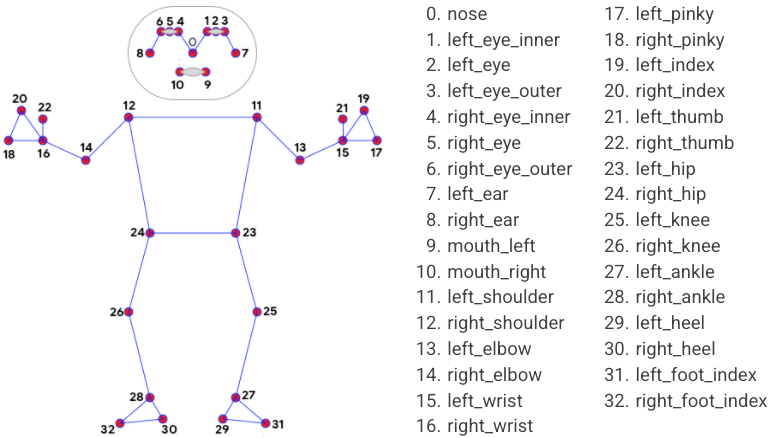

In [30]:
Image('https://google.github.io/mediapipe/images/mobile/pose_tracking_full_body_landmarks.png') ##copying the address

In [9]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark ###sometimes landmarks are not visible so we used expect to pass it
            print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=5, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

[x: 0.5989877581596375
y: 0.7984036207199097
z: -0.8610017895698547
visibility: 0.9999510049819946
, x: 0.6104397177696228
y: 0.7454849481582642
z: -0.8326614499092102
visibility: 0.999984860420227
, x: 0.624920666217804
y: 0.7442587614059448
z: -0.832231879234314
visibility: 0.9999330043792725
, x: 0.6391633749008179
y: 0.7435836791992188
z: -0.8325849771499634
visibility: 0.9999845027923584
, x: 0.5691816210746765
y: 0.7465080618858337
z: -0.8362439870834351
visibility: 0.9999784231185913
, x: 0.5512638092041016
y: 0.7471094131469727
z: -0.8366793394088745
visibility: 0.9998863935470581
, x: 0.5344276428222656
y: 0.7486833930015564
z: -0.8369582891464233
visibility: 0.9999603033065796
, x: 0.655927836894989
y: 0.763605535030365
z: -0.5430794358253479
visibility: 0.9999616146087646
, x: 0.5076294541358948
y: 0.7762163281440735
z: -0.5703805088996887
visibility: 0.9999322891235352
, x: 0.6253183484077454
y: 0.854804277420044
z: -0.7397875785827637
visibility: 0.999991774559021
, x: 0.5

[x: 0.6026589870452881
y: 0.799035370349884
z: -0.8499276041984558
visibility: 0.9999379515647888
, x: 0.6162463426589966
y: 0.7448996305465698
z: -0.8228602409362793
visibility: 0.9999732375144958
, x: 0.6270958185195923
y: 0.743766725063324
z: -0.8224201202392578
visibility: 0.999920666217804
, x: 0.6410111784934998
y: 0.7428187727928162
z: -0.8230006098747253
visibility: 0.9999744296073914
, x: 0.5722460746765137
y: 0.7465957403182983
z: -0.8259137272834778
visibility: 0.9999623894691467
, x: 0.5549212098121643
y: 0.7471931576728821
z: -0.8265868425369263
visibility: 0.9998626708984375
, x: 0.5376765131950378
y: 0.7487398386001587
z: -0.8269327878952026
visibility: 0.9999350905418396
, x: 0.654881477355957
y: 0.7617143988609314
z: -0.531012237071991
visibility: 0.9999473690986633
, x: 0.5095506906509399
y: 0.7751370072364807
z: -0.5554450154304504
visibility: 0.9999178051948547
, x: 0.6271965503692627
y: 0.8503915667533875
z: -0.7273541688919067
visibility: 0.999982476234436
, x: 0.

[x: 0.6060747504234314
y: 0.7984288930892944
z: -0.8003694415092468
visibility: 0.9999417066574097
, x: 0.6188598871231079
y: 0.7447094321250916
z: -0.7724758982658386
visibility: 0.9999735951423645
, x: 0.629158079624176
y: 0.7438868284225464
z: -0.771963357925415
visibility: 0.9999254941940308
, x: 0.6432944536209106
y: 0.7430599331855774
z: -0.772467851638794
visibility: 0.9999752640724182
, x: 0.5760130286216736
y: 0.7459998726844788
z: -0.7784843444824219
visibility: 0.9999621510505676
, x: 0.5591493844985962
y: 0.7465009689331055
z: -0.7791287899017334
visibility: 0.9998674988746643
, x: 0.5420411825180054
y: 0.7478522658348083
z: -0.7794880270957947
visibility: 0.999934732913971
, x: 0.6553928256034851
y: 0.7620489597320557
z: -0.4833239018917084
visibility: 0.9999508261680603
, x: 0.5122360587120056
y: 0.7742212414741516
z: -0.5252829790115356
visibility: 0.9999213218688965
, x: 0.6282248497009277
y: 0.8487638235092163
z: -0.6808818578720093
visibility: 0.9999828934669495
, x: 

[x: 0.6119564771652222
y: 0.7953488826751709
z: -0.762581467628479
visibility: 0.999922513961792
, x: 0.6227471828460693
y: 0.7441638708114624
z: -0.744016706943512
visibility: 0.9999685883522034
, x: 0.6350212693214417
y: 0.743859052658081
z: -0.7434065937995911
visibility: 0.9999099373817444
, x: 0.649330198764801
y: 0.743222177028656
z: -0.7437373399734497
visibility: 0.9999706745147705
, x: 0.5826200842857361
y: 0.7434329390525818
z: -0.7472088932991028
visibility: 0.9999539256095886
, x: 0.5654979348182678
y: 0.7435256242752075
z: -0.7477805018424988
visibility: 0.9998418092727661
, x: 0.5487305521965027
y: 0.744446873664856
z: -0.7485475540161133
visibility: 0.9999234080314636
, x: 0.6566458344459534
y: 0.7628440856933594
z: -0.4472232460975647
visibility: 0.9999464750289917
, x: 0.5165196657180786
y: 0.7672914266586304
z: -0.522347629070282
visibility: 0.9999071955680847
, x: 0.6299828290939331
y: 0.8445701599121094
z: -0.6568094491958618
visibility: 0.999972403049469
, x: 0.578

[x: 0.6198659539222717
y: 0.7958400249481201
z: -0.40898847579956055
visibility: 0.9999080300331116
, x: 0.6302287578582764
y: 0.7442616820335388
z: -0.3465702533721924
visibility: 0.9999393224716187
, x: 0.6429363489151001
y: 0.7440675497055054
z: -0.3462871015071869
visibility: 0.999883234500885
, x: 0.6554898023605347
y: 0.7440178990364075
z: -0.3462015390396118
visibility: 0.9999406337738037
, x: 0.5951964855194092
y: 0.7432678937911987
z: -0.3761424422264099
visibility: 0.9999138712882996
, x: 0.5801509022712708
y: 0.7428275942802429
z: -0.37644392251968384
visibility: 0.999813973903656
, x: 0.5640085339546204
y: 0.7427553534507751
z: -0.37656110525131226
visibility: 0.9998769164085388
, x: 0.6551951766014099
y: 0.7662598490715027
z: -0.03748833015561104
visibility: 0.9999189972877502
, x: 0.5245306491851807
y: 0.7633229494094849
z: -0.17306916415691376
visibility: 0.9998665452003479
, x: 0.6368825435638428
y: 0.8455376029014587
z: -0.29448387026786804
visibility: 0.99987405538558

[x: 0.6268735527992249
y: 0.8092194199562073
z: -0.46748799085617065
visibility: 0.9998837113380432
, x: 0.639017641544342
y: 0.7624032497406006
z: -0.3883998990058899
visibility: 0.9998897314071655
, x: 0.6497706174850464
y: 0.7641084790229797
z: -0.3880447745323181
visibility: 0.9998051524162292
, x: 0.6609504222869873
y: 0.7665214538574219
z: -0.38788166642189026
visibility: 0.9998716711997986
, x: 0.6071105599403381
y: 0.7573584318161011
z: -0.4338921010494232
visibility: 0.9998636841773987
, x: 0.5948240756988525
y: 0.755041241645813
z: -0.43431657552719116
visibility: 0.9997687339782715
, x: 0.5795666575431824
y: 0.7527315020561218
z: -0.4348558485507965
visibility: 0.999841570854187
, x: 0.6571537256240845
y: 0.790002167224884
z: -0.02064804919064045
visibility: 0.9998230934143066
, x: 0.5403193235397339
y: 0.7651752829551697
z: -0.22440817952156067
visibility: 0.9998488426208496
, x: 0.6383278369903564
y: 0.8610343337059021
z: -0.3328365683555603
visibility: 0.9998170733451843


[x: 0.6219128966331482
y: 0.8138037919998169
z: -0.48962658643722534
visibility: 0.9998718500137329
, x: 0.6353329420089722
y: 0.7702013254165649
z: -0.42257389426231384
visibility: 0.999871015548706
, x: 0.6456621885299683
y: 0.7720901966094971
z: -0.42229872941970825
visibility: 0.9997339248657227
, x: 0.655876874923706
y: 0.7743727564811707
z: -0.42244377732276917
visibility: 0.9998484253883362
, x: 0.6066598892211914
y: 0.7635669112205505
z: -0.45721620321273804
visibility: 0.9998433589935303
, x: 0.5945108532905579
y: 0.7599004507064819
z: -0.4576391279697418
visibility: 0.9997079372406006
, x: 0.5794591307640076
y: 0.7562884092330933
z: -0.4580514430999756
visibility: 0.9998270869255066
, x: 0.652664303779602
y: 0.7983283996582031
z: -0.07371404021978378
visibility: 0.9997557997703552
, x: 0.5425257086753845
y: 0.7669527530670166
z: -0.19929859042167664
visibility: 0.999822199344635
, x: 0.6295472383499146
y: 0.8649081587791443
z: -0.35932838916778564
visibility: 0.99982500076293

[x: 0.6108217239379883
y: 0.8083820939064026
z: -0.46332842111587524
visibility: 0.9998763203620911
, x: 0.625419020652771
y: 0.767947256565094
z: -0.39510440826416016
visibility: 0.999870777130127
, x: 0.635061502456665
y: 0.7697380781173706
z: -0.3944774568080902
visibility: 0.9997207522392273
, x: 0.6449376344680786
y: 0.7718584537506104
z: -0.3944399058818817
visibility: 0.9998505711555481
, x: 0.5984377861022949
y: 0.759944498538971
z: -0.42489004135131836
visibility: 0.9998384714126587
, x: 0.5860239863395691
y: 0.7556639313697815
z: -0.42527204751968384
visibility: 0.9996851682662964
, x: 0.5728904008865356
y: 0.7512659430503845
z: -0.4257732927799225
visibility: 0.9998205900192261
, x: 0.6416717767715454
y: 0.7947854995727539
z: -0.053847409784793854
visibility: 0.9997538328170776
, x: 0.5416533946990967
y: 0.760432779788971
z: -0.19305655360221863
visibility: 0.9998066425323486
, x: 0.6191958785057068
y: 0.8577947020530701
z: -0.3373647928237915
visibility: 0.9998456835746765


[x: 0.609636664390564
y: 0.7988241314888
z: -0.32688039541244507
visibility: 0.9998908042907715
, x: 0.620943009853363
y: 0.7611753344535828
z: -0.2507496774196625
visibility: 0.9998934864997864
, x: 0.6309898495674133
y: 0.762992799282074
z: -0.25003641843795776
visibility: 0.9997515678405762
, x: 0.6414860486984253
y: 0.7648624777793884
z: -0.2499626874923706
visibility: 0.9998822808265686
, x: 0.5901070833206177
y: 0.7537675499916077
z: -0.2745020389556885
visibility: 0.9998651146888733
, x: 0.5758787989616394
y: 0.7500713467597961
z: -0.2750246524810791
visibility: 0.9997168183326721
, x: 0.5606981515884399
y: 0.7467145323753357
z: -0.2754223346710205
visibility: 0.9998514652252197
, x: 0.6362383961677551
y: 0.7873703241348267
z: 0.09992305934429169
visibility: 0.9997943639755249
, x: 0.5250784158706665
y: 0.7660945653915405
z: -0.007006742060184479
visibility: 0.9998343586921692
, x: 0.6221374869346619
y: 0.8452708721160889
z: -0.20161275565624237
visibility: 0.9998789429664612
, 

[x: 0.6100572347640991
y: 0.7872858643531799
z: -0.32851630449295044
visibility: 0.9999182820320129
, x: 0.6179293990135193
y: 0.7506712079048157
z: -0.24807770550251007
visibility: 0.9999129176139832
, x: 0.6263179183006287
y: 0.7524101138114929
z: -0.24737267196178436
visibility: 0.9998031854629517
, x: 0.6354983448982239
y: 0.7545334100723267
z: -0.24749593436717987
visibility: 0.9999077320098877
, x: 0.5873592495918274
y: 0.7477816343307495
z: -0.2601381838321686
visibility: 0.9998943209648132
, x: 0.5734132528305054
y: 0.7472434639930725
z: -0.26071739196777344
visibility: 0.999785840511322
, x: 0.5584639310836792
y: 0.7463042140007019
z: -0.2611572742462158
visibility: 0.9998877644538879
, x: 0.6360422372817993
y: 0.7824830412864685
z: 0.08691734820604324
visibility: 0.999844491481781
, x: 0.5209754705429077
y: 0.7734809517860413
z: 0.04323773458600044
visibility: 0.9998783469200134
, x: 0.6251446008682251
y: 0.8326314091682434
z: -0.21007294952869415
visibility: 0.99990099668502

[x: 0.6044014692306519
y: 0.7859981060028076
z: -0.4728127419948578
visibility: 0.9999353289604187
, x: 0.6142089366912842
y: 0.7475003600120544
z: -0.3940621316432953
visibility: 0.9999181032180786
, x: 0.6223527193069458
y: 0.7489355802536011
z: -0.39334172010421753
visibility: 0.9998267292976379
, x: 0.6312212944030762
y: 0.7510325908660889
z: -0.39315053820610046
visibility: 0.9999154806137085
, x: 0.5826143026351929
y: 0.7457101345062256
z: -0.41498619318008423
visibility: 0.9999070763587952
, x: 0.569024384021759
y: 0.7456929087638855
z: -0.4155747890472412
visibility: 0.9998232126235962
, x: 0.5547747611999512
y: 0.7457968592643738
z: -0.41597819328308105
visibility: 0.9999040961265564
, x: 0.6346238255500793
y: 0.7778519988059998
z: -0.025259634479880333
visibility: 0.9998727440834045
, x: 0.5182403922080994
y: 0.7751027345657349
z: -0.12148052453994751
visibility: 0.9999045729637146
, x: 0.6186983585357666
y: 0.8314923048019409
z: -0.3399907946586609
visibility: 0.999909102916

[x: 0.6022945642471313
y: 0.7913281917572021
z: -0.5283498764038086
visibility: 0.9999406933784485
, x: 0.6123961210250854
y: 0.7480027675628662
z: -0.4456728994846344
visibility: 0.9999076128005981
, x: 0.6211198568344116
y: 0.7493864297866821
z: -0.44495177268981934
visibility: 0.9998146891593933
, x: 0.6301775574684143
y: 0.7516323328018188
z: -0.44480323791503906
visibility: 0.9999054074287415
, x: 0.578163743019104
y: 0.746881365776062
z: -0.47499507665634155
visibility: 0.9999064803123474
, x: 0.5640058517456055
y: 0.7472854256629944
z: -0.47539764642715454
visibility: 0.9998329281806946
, x: 0.5498491525650024
y: 0.7480471730232239
z: -0.4757184386253357
visibility: 0.9999076724052429
, x: 0.6333153247833252
y: 0.7775713801383972
z: -0.07879727333784103
visibility: 0.9998816251754761
, x: 0.5129294395446777
y: 0.7787328958511353
z: -0.19376565515995026
visibility: 0.9999176263809204
, x: 0.618250846862793
y: 0.8391955494880676
z: -0.3903895318508148
visibility: 0.999898433685302

[x: 0.602067768573761
y: 0.7958484888076782
z: -0.7097006440162659
visibility: 0.9999346733093262
, x: 0.6113617420196533
y: 0.7506169080734253
z: -0.6432236433029175
visibility: 0.9998824596405029
, x: 0.6205587387084961
y: 0.751538097858429
z: -0.6425603032112122
visibility: 0.9997793436050415
, x: 0.6299746036529541
y: 0.75336092710495
z: -0.6425676345825195
visibility: 0.9998713135719299
, x: 0.5767916440963745
y: 0.7504431009292603
z: -0.664397120475769
visibility: 0.999896228313446
, x: 0.5625299215316772
y: 0.7513605356216431
z: -0.665068507194519
visibility: 0.9998279213905334
, x: 0.5482364892959595
y: 0.7529876232147217
z: -0.665727972984314
visibility: 0.9999012351036072
, x: 0.6302204728126526
y: 0.7784788608551025
z: -0.2868444621562958
visibility: 0.9998658299446106
, x: 0.5086855292320251
y: 0.7851847410202026
z: -0.3816305100917816
visibility: 0.9999186992645264
, x: 0.618317723274231
y: 0.8449864983558655
z: -0.5746804475784302
visibility: 0.9998604655265808
, x: 0.572

[x: 0.6024976968765259
y: 0.8005912899971008
z: -0.7929210662841797
visibility: 0.9999501705169678
, x: 0.6110699772834778
y: 0.7524138689041138
z: -0.7286984324455261
visibility: 0.9999039173126221
, x: 0.6201897859573364
y: 0.7532494068145752
z: -0.7280589938163757
visibility: 0.9998227953910828
, x: 0.630146861076355
y: 0.7551475167274475
z: -0.7279073596000671
visibility: 0.9998902082443237
, x: 0.5773720741271973
y: 0.7520427703857422
z: -0.7511024475097656
visibility: 0.9999205470085144
, x: 0.5633014440536499
y: 0.7526427507400513
z: -0.7517474293708801
visibility: 0.9998709559440613
, x: 0.5490085482597351
y: 0.7539414167404175
z: -0.7523609399795532
visibility: 0.9999246597290039
, x: 0.630308985710144
y: 0.7782346606254578
z: -0.36602267622947693
visibility: 0.9998926520347595
, x: 0.5095009803771973
y: 0.7824974656105042
z: -0.4714334011077881
visibility: 0.9999402761459351
, x: 0.6178559064865112
y: 0.8526189923286438
z: -0.6546327471733093
visibility: 0.9998779296875
, x: 

[x: 0.5879014134407043
y: 0.8004674315452576
z: -0.6861468553543091
visibility: 0.9999619722366333
, x: 0.6001380681991577
y: 0.7523671388626099
z: -0.6076797246932983
visibility: 0.9999263882637024
, x: 0.6117123961448669
y: 0.7529486417770386
z: -0.60716712474823
visibility: 0.9998615980148315
, x: 0.6224386096000671
y: 0.7544945478439331
z: -0.6068524122238159
visibility: 0.9999133348464966
, x: 0.5654624700546265
y: 0.7526336312294006
z: -0.62883061170578
visibility: 0.9999420046806335
, x: 0.5519515872001648
y: 0.7534391283988953
z: -0.6292539834976196
visibility: 0.9999049305915833
, x: 0.538301408290863
y: 0.7549170255661011
z: -0.6301215291023254
visibility: 0.9999454021453857
, x: 0.630511999130249
y: 0.7767868638038635
z: -0.17967289686203003
visibility: 0.9999123811721802
, x: 0.5054707527160645
y: 0.7823249101638794
z: -0.310380756855011
visibility: 0.9999556541442871
, x: 0.6090683341026306
y: 0.8523260951042175
z: -0.5309699177742004
visibility: 0.9998896718025208
, x: 0.

[x: 0.5787254571914673
y: 0.8000552654266357
z: -0.6904348134994507
visibility: 0.999969482421875
, x: 0.5922372937202454
y: 0.7521885633468628
z: -0.6175556778907776
visibility: 0.9999319314956665
, x: 0.605148434638977
y: 0.7523301243782043
z: -0.6171272397041321
visibility: 0.9998798966407776
, x: 0.6171369552612305
y: 0.752979040145874
z: -0.6168708205223083
visibility: 0.9999167323112488
, x: 0.555709183216095
y: 0.7534008622169495
z: -0.6299690008163452
visibility: 0.9999513030052185
, x: 0.5422557592391968
y: 0.7549042105674744
z: -0.6304725408554077
visibility: 0.999925434589386
, x: 0.5277820825576782
y: 0.7571179866790771
z: -0.6309966444969177
visibility: 0.999956488609314
, x: 0.6315773725509644
y: 0.7728660702705383
z: -0.23811538517475128
visibility: 0.999919593334198
, x: 0.5002524256706238
y: 0.7849414944648743
z: -0.29068124294281006
visibility: 0.9999653100967407
, x: 0.605657696723938
y: 0.8509274125099182
z: -0.5501194000244141
visibility: 0.9998739957809448
, x: 0.

[x: 0.5796985626220703
y: 0.8021567463874817
z: -0.4917148947715759
visibility: 0.9999764561653137
, x: 0.592904806137085
y: 0.7535344362258911
z: -0.42056146264076233
visibility: 0.9999461770057678
, x: 0.6056293249130249
y: 0.7533611059188843
z: -0.4199003279209137
visibility: 0.9999047517776489
, x: 0.6174548268318176
y: 0.753838837146759
z: -0.41972512006759644
visibility: 0.9999341368675232
, x: 0.5565372705459595
y: 0.7557434439659119
z: -0.4384377896785736
visibility: 0.9999632835388184
, x: 0.5430784821510315
y: 0.7571986317634583
z: -0.4388940930366516
visibility: 0.999943733215332
, x: 0.528647780418396
y: 0.7590445280075073
z: -0.439420223236084
visibility: 0.9999679923057556
, x: 0.6313892602920532
y: 0.7733489871025085
z: -0.07359085977077484
visibility: 0.9999346137046814
, x: 0.49976077675819397
y: 0.7852000594139099
z: -0.15236566960811615
visibility: 0.9999737739562988
, x: 0.6053184270858765
y: 0.8521642088890076
z: -0.3637423813343048
visibility: 0.9998867511749268
,

[x: 0.5784637331962585
y: 0.8059808611869812
z: -0.9509709477424622
visibility: 0.9999799132347107
, x: 0.5912178754806519
y: 0.7543579936027527
z: -0.8988938331604004
visibility: 0.9999544620513916
, x: 0.6038435697555542
y: 0.7539668679237366
z: -0.8983704447746277
visibility: 0.9999195337295532
, x: 0.6154785752296448
y: 0.7546219229698181
z: -0.8982523083686829
visibility: 0.9999439716339111
, x: 0.5552166104316711
y: 0.7586637139320374
z: -0.9132539629936218
visibility: 0.9999695420265198
, x: 0.5414479970932007
y: 0.7609331607818604
z: -0.913925290107727
visibility: 0.9999532103538513
, x: 0.5269219279289246
y: 0.7634350061416626
z: -0.9145037531852722
visibility: 0.9999730587005615
, x: 0.6286522746086121
y: 0.7745851278305054
z: -0.5404481291770935
visibility: 0.9999479651451111
, x: 0.494830459356308
y: 0.7890444993972778
z: -0.6054553985595703
visibility: 0.9999786615371704
, x: 0.6037564873695374
y: 0.8557072281837463
z: -0.8102117776870728
visibility: 0.9999017715454102
, x

[x: 0.575126588344574
y: 0.8078669905662537
z: -0.7451051473617554
visibility: 0.9999821782112122
, x: 0.5883127450942993
y: 0.7559988498687744
z: -0.678477942943573
visibility: 0.999959409236908
, x: 0.6011978387832642
y: 0.7551615834236145
z: -0.6779636144638062
visibility: 0.9999306797981262
, x: 0.6133537888526917
y: 0.7553967237472534
z: -0.6778172254562378
visibility: 0.9999511241912842
, x: 0.55146324634552
y: 0.7614616751670837
z: -0.6876882314682007
visibility: 0.9999706149101257
, x: 0.5376317501068115
y: 0.7640036940574646
z: -0.688369631767273
visibility: 0.9999558329582214
, x: 0.522908091545105
y: 0.7667245268821716
z: -0.6887723207473755
visibility: 0.9999728202819824
, x: 0.6270983815193176
y: 0.7748926281929016
z: -0.32147371768951416
visibility: 0.9999573230743408
, x: 0.4912607669830322
y: 0.7952091693878174
z: -0.36649617552757263
visibility: 0.9999800324440002
, x: 0.6013500094413757
y: 0.8571961522102356
z: -0.6143344640731812
visibility: 0.999916136264801
, x: 0.

[x: 0.5722758173942566
y: 0.8042392730712891
z: -0.5686029195785522
visibility: 0.9999858140945435
, x: 0.5845924019813538
y: 0.755498468875885
z: -0.4995010793209076
visibility: 0.9999632239341736
, x: 0.5969849824905396
y: 0.7543848752975464
z: -0.4989356994628906
visibility: 0.9999434351921082
, x: 0.6087849140167236
y: 0.7542659044265747
z: -0.4987388551235199
visibility: 0.9999583959579468
, x: 0.548190712928772
y: 0.7610005736351013
z: -0.51079261302948
visibility: 0.9999716877937317
, x: 0.5347490906715393
y: 0.7633134126663208
z: -0.5114660859107971
visibility: 0.9999621510505676
, x: 0.5202698707580566
y: 0.7657493948936462
z: -0.5117453336715698
visibility: 0.999974250793457
, x: 0.619888424873352
y: 0.7723141312599182
z: -0.14522424340248108
visibility: 0.9999671578407288
, x: 0.4887855052947998
y: 0.7927244901657104
z: -0.19644610583782196
visibility: 0.9999833703041077
, x: 0.5979982614517212
y: 0.8519197106361389
z: -0.4388115406036377
visibility: 0.9999311566352844
, x: 

[x: 0.5720893740653992
y: 0.8038743138313293
z: -0.48939260840415955
visibility: 0.9999866485595703
, x: 0.5853850841522217
y: 0.7560535669326782
z: -0.41511955857276917
visibility: 0.9999592900276184
, x: 0.5979672074317932
y: 0.7548332214355469
z: -0.414595365524292
visibility: 0.9999427795410156
, x: 0.6097630262374878
y: 0.7545297145843506
z: -0.4144009053707123
visibility: 0.9999573826789856
, x: 0.5481759309768677
y: 0.7615435123443604
z: -0.42816972732543945
visibility: 0.9999690651893616
, x: 0.5346737504005432
y: 0.763819694519043
z: -0.4289271831512451
visibility: 0.9999625086784363
, x: 0.5204122066497803
y: 0.7660980820655823
z: -0.4291291832923889
visibility: 0.999973475933075
, x: 0.6223326921463013
y: 0.7727980017662048
z: -0.060879725962877274
visibility: 0.9999697804450989
, x: 0.4889150559902191
y: 0.7920501232147217
z: -0.11978691816329956
visibility: 0.9999845623970032
, x: 0.597551703453064
y: 0.8518927693367004
z: -0.36186835169792175
visibility: 0.999930024147033

[x: 0.5749605298042297
y: 0.8044527769088745
z: -0.2991476356983185
visibility: 0.9999871850013733
, x: 0.5872303247451782
y: 0.7563160061836243
z: -0.2151966392993927
visibility: 0.9999584555625916
, x: 0.599513053894043
y: 0.7550355195999146
z: -0.21449239552021027
visibility: 0.9999421238899231
, x: 0.611068844795227
y: 0.7546321749687195
z: -0.21420428156852722
visibility: 0.9999584555625916
, x: 0.5501746535301208
y: 0.7618091702461243
z: -0.23552031815052032
visibility: 0.9999693632125854
, x: 0.5366164445877075
y: 0.7640013098716736
z: -0.23632366955280304
visibility: 0.9999638795852661
, x: 0.5229572057723999
y: 0.7661254405975342
z: -0.23648545145988464
visibility: 0.9999751448631287
, x: 0.6222561001777649
y: 0.7722684741020203
z: 0.15706218779087067
visibility: 0.9999719262123108
, x: 0.49002304673194885
y: 0.7914875745773315
z: 0.0641307681798935
visibility: 0.9999863505363464
, x: 0.5991255044937134
y: 0.8527887463569641
z: -0.16720950603485107
visibility: 0.99993288516998

[x: 0.5781559944152832
y: 0.8040380477905273
z: -0.35653311014175415
visibility: 0.9999873638153076
, x: 0.5895596742630005
y: 0.7557392120361328
z: -0.2771020829677582
visibility: 0.999954879283905
, x: 0.601311206817627
y: 0.754642903804779
z: -0.2763093113899231
visibility: 0.9999392032623291
, x: 0.6127530336380005
y: 0.754339337348938
z: -0.275966078042984
visibility: 0.9999575614929199
, x: 0.5533211827278137
y: 0.7596775889396667
z: -0.2912244498729706
visibility: 0.9999679923057556
, x: 0.5398606061935425
y: 0.7608563899993896
z: -0.2922206521034241
visibility: 0.9999640583992004
, x: 0.5264735817909241
y: 0.7619300484657288
z: -0.2924344539642334
visibility: 0.999976396560669
, x: 0.6222280263900757
y: 0.7714545130729675
z: 0.07473583519458771
visibility: 0.9999722242355347
, x: 0.4923093914985657
y: 0.7859865427017212
z: 0.010418749414384365
visibility: 0.9999877214431763
, x: 0.5998232960700989
y: 0.8516966104507446
z: -0.23264248669147491
visibility: 0.9999374151229858
, x:

[x: 0.5781204700469971
y: 0.8021150827407837
z: -0.6361421942710876
visibility: 0.9999833106994629
, x: 0.5904881954193115
y: 0.7547484040260315
z: -0.571331262588501
visibility: 0.9999431371688843
, x: 0.6021983027458191
y: 0.7537402510643005
z: -0.5707794427871704
visibility: 0.9999247789382935
, x: 0.6135302782058716
y: 0.7533798813819885
z: -0.5707030296325684
visibility: 0.999946653842926
, x: 0.5540187954902649
y: 0.758255660533905
z: -0.5776208639144897
visibility: 0.9999539852142334
, x: 0.540573239326477
y: 0.7593498826026917
z: -0.5782191753387451
visibility: 0.9999465942382812
, x: 0.5272966027259827
y: 0.7603997588157654
z: -0.5785516500473022
visibility: 0.9999618530273438
, x: 0.6252998113632202
y: 0.7693259716033936
z: -0.2156551629304886
visibility: 0.9999648928642273
, x: 0.4958876669406891
y: 0.7843675017356873
z: -0.24603573977947235
visibility: 0.9999800324440002
, x: 0.6005887985229492
y: 0.847381591796875
z: -0.5042344331741333
visibility: 0.9999285936355591
, x: 

[x: 0.5779598951339722
y: 0.8051187992095947
z: -0.6456573605537415
visibility: 0.999982476234436
, x: 0.58968186378479
y: 0.7582968473434448
z: -0.5800856947898865
visibility: 0.9999412298202515
, x: 0.6016160249710083
y: 0.7581102252006531
z: -0.5795361995697021
visibility: 0.9999239444732666
, x: 0.612766683101654
y: 0.7584228515625
z: -0.5794549584388733
visibility: 0.9999434947967529
, x: 0.5523321032524109
y: 0.7602800130844116
z: -0.5895727872848511
visibility: 0.9999486207962036
, x: 0.5381295084953308
y: 0.7613001465797424
z: -0.5901703834533691
visibility: 0.9999396800994873
, x: 0.5239182710647583
y: 0.7626437544822693
z: -0.5904010534286499
visibility: 0.9999544620513916
, x: 0.6242377758026123
y: 0.7740438580513
z: -0.2260512411594391
visibility: 0.9999629855155945
, x: 0.49425992369651794
y: 0.7871795892715454
z: -0.2716394066810608
visibility: 0.9999755024909973
, x: 0.5999165177345276
y: 0.8518489003181458
z: -0.5150766968727112
visibility: 0.9999294877052307
, x: 0.552

[x: 0.6026667356491089
y: 0.8051954507827759
z: -0.38763922452926636
visibility: 0.9999250769615173
, x: 0.607309103012085
y: 0.7536265850067139
z: -0.32455673813819885
visibility: 0.9998732209205627
, x: 0.6154733896255493
y: 0.7529432773590088
z: -0.32415521144866943
visibility: 0.9998432397842407
, x: 0.6247316002845764
y: 0.7522857785224915
z: -0.3247358202934265
visibility: 0.9998917579650879
, x: 0.5788965225219727
y: 0.7540862560272217
z: -0.36702534556388855
visibility: 0.9998517036437988
, x: 0.5647672414779663
y: 0.7531159520149231
z: -0.3675007224082947
visibility: 0.9998142719268799
, x: 0.5501323342323303
y: 0.7511972784996033
z: -0.3679509162902832
visibility: 0.9998071789741516
, x: 0.6182550191879272
y: 0.7703531384468079
z: -0.009836560115218163
visibility: 0.9999226331710815
, x: 0.5071159601211548
y: 0.7641394138336182
z: -0.20950822532176971
visibility: 0.9998411536216736
, x: 0.6102930307388306
y: 0.8546093106269836
z: -0.2648411691188812
visibility: 0.999847650527

[x: 0.5979036092758179
y: 0.7947210073471069
z: -0.8046112060546875
visibility: 0.9999387860298157
, x: 0.6061631441116333
y: 0.7419068217277527
z: -0.7605565786361694
visibility: 0.9999154210090637
, x: 0.6165289282798767
y: 0.7400042414665222
z: -0.7600523829460144
visibility: 0.9998782873153687
, x: 0.6301085948944092
y: 0.7377691268920898
z: -0.7605335116386414
visibility: 0.9999278783798218
, x: 0.5701067447662354
y: 0.7478087544441223
z: -0.7599531412124634
visibility: 0.9998979568481445
, x: 0.5519814491271973
y: 0.7495526671409607
z: -0.7605286240577698
visibility: 0.9998375177383423
, x: 0.5362100601196289
y: 0.7507902979850769
z: -0.7607953548431396
visibility: 0.9998624324798584
, x: 0.6441634893417358
y: 0.7559183239936829
z: -0.40908369421958923
visibility: 0.9999386668205261
, x: 0.5042595267295837
y: 0.7691598534584045
z: -0.41948461532592773
visibility: 0.9998593330383301
, x: 0.6181679964065552
y: 0.84845370054245
z: -0.6637250185012817
visibility: 0.9999025464057922
,

[x: 0.6011011004447937
y: 0.7955401539802551
z: -0.8034817576408386
visibility: 0.9999362826347351
, x: 0.6149441003799438
y: 0.7421814799308777
z: -0.7575308084487915
visibility: 0.9999309778213501
, x: 0.6270159482955933
y: 0.7402733564376831
z: -0.7569886445999146
visibility: 0.9998823404312134
, x: 0.6419638395309448
y: 0.7380349040031433
z: -0.7575308084487915
visibility: 0.9999411702156067
, x: 0.570435643196106
y: 0.7482491731643677
z: -0.7579812407493591
visibility: 0.9999120831489563
, x: 0.552619218826294
y: 0.7501355409622192
z: -0.7586684823036194
visibility: 0.9998210668563843
, x: 0.5367550253868103
y: 0.752157986164093
z: -0.7589122653007507
visibility: 0.9998747706413269
, x: 0.6572951674461365
y: 0.7564843893051147
z: -0.4007790684700012
visibility: 0.9999361038208008
, x: 0.507267415523529
y: 0.7733893990516663
z: -0.4155554175376892
visibility: 0.9998425841331482
, x: 0.6295595765113831
y: 0.851736307144165
z: -0.6608740091323853
visibility: 0.9999264478683472
, x: 0

[x: 0.6027005910873413
y: 0.8001933693885803
z: -0.7854927182197571
visibility: 0.9999303817749023
, x: 0.6178942918777466
y: 0.7442298531532288
z: -0.7409883141517639
visibility: 0.9999366998672485
, x: 0.6294004917144775
y: 0.7420718669891357
z: -0.7404536604881287
visibility: 0.9998741149902344
, x: 0.6431397199630737
y: 0.7399088144302368
z: -0.7410558462142944
visibility: 0.9999467134475708
, x: 0.5724868774414062
y: 0.7502188086509705
z: -0.746299147605896
visibility: 0.9999157786369324
, x: 0.555118978023529
y: 0.7518910765647888
z: -0.7469379305839539
visibility: 0.9997935891151428
, x: 0.5389382243156433
y: 0.7539789080619812
z: -0.7472902536392212
visibility: 0.9998751282691956
, x: 0.6566319465637207
y: 0.7584207653999329
z: -0.3877630829811096
visibility: 0.9999276995658875
, x: 0.5095924735069275
y: 0.7747063040733337
z: -0.4257572293281555
visibility: 0.9998114705085754
, x: 0.6298710107803345
y: 0.8573042750358582
z: -0.643957257270813
visibility: 0.9999388456344604
, x:

[x: 0.6071335673332214
y: 0.8144608736038208
z: -0.890018105506897
visibility: 0.999925434589386
, x: 0.623214602470398
y: 0.75510174036026
z: -0.8555877804756165
visibility: 0.9999440312385559
, x: 0.6352217793464661
y: 0.7530520558357239
z: -0.8550424575805664
visibility: 0.9998719096183777
, x: 0.6489010453224182
y: 0.751110315322876
z: -0.8556174039840698
visibility: 0.9999531507492065
, x: 0.577267050743103
y: 0.7595255374908447
z: -0.8533785939216614
visibility: 0.999920129776001
, x: 0.5597286820411682
y: 0.760463297367096
z: -0.854020893573761
visibility: 0.9997655749320984
, x: 0.5431134700775146
y: 0.7619503736495972
z: -0.8543534278869629
visibility: 0.9998762607574463
, x: 0.6619232892990112
y: 0.7666854858398438
z: -0.5124768018722534
visibility: 0.9999231696128845
, x: 0.5136762857437134
y: 0.7786931395530701
z: -0.5127595067024231
visibility: 0.9997944235801697
, x: 0.6342176795005798
y: 0.8707795739173889
z: -0.747829794883728
visibility: 0.9999517202377319
, x: 0.57688

[x: 0.6051241159439087
y: 0.8150604963302612
z: -0.8532567024230957
visibility: 0.9999157190322876
, x: 0.6222986578941345
y: 0.7563304901123047
z: -0.8179414868354797
visibility: 0.9999434947967529
, x: 0.6349191665649414
y: 0.7542205452919006
z: -0.8173120617866516
visibility: 0.9998582005500793
, x: 0.6480579972267151
y: 0.7525123357772827
z: -0.8178591728210449
visibility: 0.9999527335166931
, x: 0.5757710337638855
y: 0.7607408761978149
z: -0.816681981086731
visibility: 0.9999164938926697
, x: 0.5585711002349854
y: 0.7615442276000977
z: -0.8174451589584351
visibility: 0.9997332096099854
, x: 0.541197657585144
y: 0.7627851366996765
z: -0.8177286982536316
visibility: 0.9998684525489807
, x: 0.6616621613502502
y: 0.7687879204750061
z: -0.4801376760005951
visibility: 0.9999138712882996
, x: 0.513229489326477
y: 0.7799016237258911
z: -0.4854651391506195
visibility: 0.9997725486755371
, x: 0.6332966685295105
y: 0.871684193611145
z: -0.7148697376251221
visibility: 0.9999566078186035
, x: 

[x: 0.604718804359436
y: 0.8058412671089172
z: -0.8445301055908203
visibility: 0.9999114871025085
, x: 0.6215511560440063
y: 0.7475550770759583
z: -0.8090400695800781
visibility: 0.9999455213546753
, x: 0.6345133781433105
y: 0.746094286441803
z: -0.8083823919296265
visibility: 0.9998576045036316
, x: 0.6476526260375977
y: 0.7446046471595764
z: -0.808975338935852
visibility: 0.9999542236328125
, x: 0.574107825756073
y: 0.7520132660865784
z: -0.8077512979507446
visibility: 0.9999160766601562
, x: 0.5565791726112366
y: 0.7529010772705078
z: -0.8085545301437378
visibility: 0.999720573425293
, x: 0.5388492345809937
y: 0.7544593811035156
z: -0.8088371157646179
visibility: 0.9998660087585449
, x: 0.661946177482605
y: 0.7637201547622681
z: -0.47047287225723267
visibility: 0.9999109506607056
, x: 0.5113130807876587
y: 0.7784378528594971
z: -0.47889041900634766
visibility: 0.999769389629364
, x: 0.6332997679710388
y: 0.8648384213447571
z: -0.7069153189659119
visibility: 0.9999611377716064
, x: 0

[x: 0.6036891341209412
y: 0.8020220398902893
z: -0.7655953764915466
visibility: 0.9998964071273804
, x: 0.6209442019462585
y: 0.7448921799659729
z: -0.7283250093460083
visibility: 0.9999323487281799
, x: 0.6341639757156372
y: 0.744053840637207
z: -0.7276944518089294
visibility: 0.9998384714126587
, x: 0.6471085548400879
y: 0.7431669235229492
z: -0.7283990383148193
visibility: 0.9999423027038574
, x: 0.5735570192337036
y: 0.7484866380691528
z: -0.7295074462890625
visibility: 0.9998990297317505
, x: 0.5560911893844604
y: 0.7495176792144775
z: -0.7303711771965027
visibility: 0.9996932148933411
, x: 0.5385148525238037
y: 0.7514095306396484
z: -0.7308202385902405
visibility: 0.9998452663421631
, x: 0.6621691584587097
y: 0.7630713582038879
z: -0.3999520242214203
visibility: 0.9998922348022461
, x: 0.511167049407959
y: 0.7775152325630188
z: -0.4121585488319397
visibility: 0.999755322933197
, x: 0.6325393915176392
y: 0.8623363375663757
z: -0.6340053677558899
visibility: 0.999954342842102
, x: 

[x: 0.6037400364875793
y: 0.8019534349441528
z: -0.8094482421875
visibility: 0.9998930096626282
, x: 0.6210318803787231
y: 0.7450047731399536
z: -0.767830491065979
visibility: 0.9999305009841919
, x: 0.6341332197189331
y: 0.7442104816436768
z: -0.7672949433326721
visibility: 0.999830961227417
, x: 0.6470896005630493
y: 0.7433261871337891
z: -0.7679206728935242
visibility: 0.9999404549598694
, x: 0.5736767649650574
y: 0.7482842206954956
z: -0.771769106388092
visibility: 0.9998974800109863
, x: 0.5563489198684692
y: 0.7492915987968445
z: -0.772484302520752
visibility: 0.9996877908706665
, x: 0.5388745069503784
y: 0.7510907053947449
z: -0.7729396224021912
visibility: 0.9998447895050049
, x: 0.6622205972671509
y: 0.7633705139160156
z: -0.4219551086425781
visibility: 0.9998869895935059
, x: 0.5112706422805786
y: 0.7772431969642639
z: -0.4490748345851898
visibility: 0.9997555017471313
, x: 0.6324526071548462
y: 0.862448513507843
z: -0.6697143316268921
visibility: 0.9999541640281677
, x: 0.57

[x: 0.6037496328353882
y: 0.8051316738128662
z: -0.8703485727310181
visibility: 0.9998818635940552
, x: 0.6214141249656677
y: 0.7478891015052795
z: -0.832471489906311
visibility: 0.9999309778213501
, x: 0.6343923807144165
y: 0.7468575239181519
z: -0.8320080041885376
visibility: 0.9998214840888977
, x: 0.6474844217300415
y: 0.7458905577659607
z: -0.8326152563095093
visibility: 0.9999411106109619
, x: 0.5737102031707764
y: 0.7507862448692322
z: -0.8309054374694824
visibility: 0.9998945593833923
, x: 0.5563940405845642
y: 0.7514238953590393
z: -0.8315927386283875
visibility: 0.9996578097343445
, x: 0.5389017462730408
y: 0.7528389692306519
z: -0.8319938778877258
visibility: 0.9998358488082886
, x: 0.6639032959938049
y: 0.7647259831428528
z: -0.4801487922668457
visibility: 0.9998844861984253
, x: 0.5114830732345581
y: 0.7775790095329285
z: -0.4837835431098938
visibility: 0.9997279644012451
, x: 0.6324707865715027
y: 0.8639292120933533
z: -0.7257136106491089
visibility: 0.9999533295631409
, 

[x: 0.6038331985473633
y: 0.8076468706130981
z: -0.826746940612793
visibility: 0.9998772144317627
, x: 0.6214560270309448
y: 0.750326931476593
z: -0.786988377571106
visibility: 0.9999297261238098
, x: 0.634442925453186
y: 0.7490228414535522
z: -0.7864607572555542
visibility: 0.9998148083686829
, x: 0.647494375705719
y: 0.7478916645050049
z: -0.7870919108390808
visibility: 0.9999406933784485
, x: 0.5735893249511719
y: 0.7526047229766846
z: -0.7879984378814697
visibility: 0.9998908042907715
, x: 0.5562560558319092
y: 0.7528184652328491
z: -0.7886858582496643
visibility: 0.999635636806488
, x: 0.538740873336792
y: 0.7539752721786499
z: -0.7891134023666382
visibility: 0.9998264908790588
, x: 0.6639026999473572
y: 0.7654575109481812
z: -0.44603481888771057
visibility: 0.9998809099197388
, x: 0.5113548040390015
y: 0.7781575322151184
z: -0.45994776487350464
visibility: 0.9997072815895081
, x: 0.6324961185455322
y: 0.8653316497802734
z: -0.6880843043327332
visibility: 0.9999526739120483
, x: 0

[x: 0.6087170839309692
y: 0.8080027103424072
z: -0.8349531292915344
visibility: 0.9998813271522522
, x: 0.6256706714630127
y: 0.750243604183197
z: -0.7916351556777954
visibility: 0.9999361038208008
, x: 0.6378067135810852
y: 0.7488754391670227
z: -0.7910887002944946
visibility: 0.9998244047164917
, x: 0.6519268751144409
y: 0.7475389242172241
z: -0.7916364073753357
visibility: 0.9999456405639648
, x: 0.5786991715431213
y: 0.7527856230735779
z: -0.7950334548950195
visibility: 0.9999009966850281
, x: 0.5612713098526001
y: 0.7530969977378845
z: -0.7957576513290405
visibility: 0.9996576905250549
, x: 0.5442653894424438
y: 0.754252016544342
z: -0.7961119413375854
visibility: 0.9998407959938049
, x: 0.6669130325317383
y: 0.7651087045669556
z: -0.43190664052963257
visibility: 0.9998878836631775
, x: 0.5155941843986511
y: 0.7783762216567993
z: -0.4590514600276947
visibility: 0.9997256994247437
, x: 0.6355674862861633
y: 0.8657907247543335
z: -0.6904072761535645
visibility: 0.9999558329582214
, 

[x: 0.6134172677993774
y: 0.8067005276679993
z: -0.8006675839424133
visibility: 0.9998740553855896
, x: 0.6294955015182495
y: 0.7488649487495422
z: -0.7579139471054077
visibility: 0.9999340772628784
, x: 0.6412830352783203
y: 0.7475589513778687
z: -0.7573443055152893
visibility: 0.9998152852058411
, x: 0.6561053991317749
y: 0.7462428212165833
z: -0.7578896284103394
visibility: 0.9999432563781738
, x: 0.5827775001525879
y: 0.7514758706092834
z: -0.7605258226394653
visibility: 0.9998981356620789
, x: 0.5649948120117188
y: 0.7521613240242004
z: -0.7612487077713013
visibility: 0.9996452927589417
, x: 0.5478501319885254
y: 0.7534407377243042
z: -0.7615848779678345
visibility: 0.9998371005058289
, x: 0.6703592538833618
y: 0.7643195986747742
z: -0.4123547077178955
visibility: 0.9998782873153687
, x: 0.5182067155838013
y: 0.7783381938934326
z: -0.43565329909324646
visibility: 0.9997142553329468
, x: 0.6394200921058655
y: 0.8653921484947205
z: -0.6620198488235474
visibility: 0.9999544024467468


[x: 0.6152464151382446
y: 0.8064748048782349
z: -0.8621962666511536
visibility: 0.9998741745948792
, x: 0.6310639977455139
y: 0.748633623123169
z: -0.8198086023330688
visibility: 0.9999353885650635
, x: 0.6425366401672363
y: 0.7473421096801758
z: -0.8192631006240845
visibility: 0.9998137354850769
, x: 0.657211184501648
y: 0.7460185885429382
z: -0.81980961561203
visibility: 0.9999441504478455
, x: 0.5851062536239624
y: 0.7510883808135986
z: -0.8216334581375122
visibility: 0.99989914894104
, x: 0.5671806931495667
y: 0.7517900466918945
z: -0.8223091959953308
visibility: 0.9996390342712402
, x: 0.5497869253158569
y: 0.7529944181442261
z: -0.8226615786552429
visibility: 0.999837338924408
, x: 0.6710046529769897
y: 0.7642077803611755
z: -0.4610825181007385
visibility: 0.9998762607574463
, x: 0.5189222097396851
y: 0.7781023383140564
z: -0.48037639260292053
visibility: 0.9997035264968872
, x: 0.6404443979263306
y: 0.8654155731201172
z: -0.7170646786689758
visibility: 0.9999560713768005
, x: 0.

In [10]:
len(landmarks)

33

In [11]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)                     ##from the image we can see that the different landmarks has different index 0 for nose till 32 right foot index 

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [12]:
len(mp_pose.PoseLandmark)

33

In [13]:
x= landmarks[mp_pose.PoseLandmark.NOSE.value]

In [20]:
print(x.toarray())

AttributeError: toarray

# Calculating Angles

In [14]:
def calculate_angle(a,b,c):
    a=np.array(a) #first .... in the figure of pose above  for bisceps assume the point 11 as first 
    b=np.array(b) #mid ...... in the figure of pose above  for bisceps assume the point 13 as mid
    c=np.array(c) #End .......in the figure of pose above  for bisceps assume the point 15 as end ..........for joints
    
    radians=np.arctan2(c[1]-b[1],c[0]-b[0])-np.arctan2(a[1]-b[1],a[0]-b[0]) ## angle between line 11-13 and 13-15
    angle=np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle= 360-angle
        
    return angle
        

In [15]:
shoulder =[landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y] ##taking out x,y value othe the shoulder point (joint)
elbow =[landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist =[landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [16]:
shoulder

[0.7655051946640015, 0.9838865995407104]

In [17]:
elbow

[0.9547470211982727, 1.2190935611724854]

In [18]:
wrist

[0.8639868497848511, 0.925650417804718]

In [19]:
tuple(np.multiply(elbow,[640,480]).astype(int))

(611, 585)

In [21]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            shoulder =[landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y] ##taking out x,y value othe the shoulder point (joint)
            elbow =[landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist =[landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            #calculate angle 
            angle=calculate_angle(shoulder,elbow,wrist)
            
            #visualizing angle between shoulder-elbow line and elow_wrist line
            cv2.putText(image,str(angle),
                       tuple(np.multiply(elbow,[640,480]).astype(int),              ####640x480 is the resolution of my webcam
                       cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2,cv.LINE_AAA)    ####we can change the font size and color too
                       )
            
            print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=5, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 4, cv2.LINE_AA
                                )
                       
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# biceps curl counting

In [24]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
            
            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 15 and stage =='down':
                stage="up"
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
       
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2
3
4
